In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
N = 100

x1 = np.random.normal(0, 1, N)
x2 = np.random.normal(0, 1, N)
x3 = np.random.normal(0, 1, N)

X = np.c_[x1, x2, x3]
y = 1 / 2 * x1 + 3 / 4 * x2 + 1 * x3 + np.random.normal(0, 0.5, N)

In [3]:
def train_test_split_add_noise(X, y, N=1):
    X_add = np.c_[X,
                  y[:, None] + np.random.normal(0, 0.5, size=(X.shape[0], N))]
    return train_test_split(X_add, y, test_size=0.9)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.9,
                                                    random_state=42)

In [20]:
N_lst = np.arange(15)
mse_lst = []

K = 100

for N in N_lst:

    this_mse_lst = []
    for _ in range(K):
        X_train, X_test, y_train, y_test = train_test_split_add_noise(X,
                                                                      y,
                                                                      N=N)
        this_mse_lst.append(
            mean_squared_error(
                y_test,
                LinearRegression().fit(X_train, y_train).predict(X_test)))
    mse_lst.append(np.median(this_mse_lst))

(0.0, 1.0)

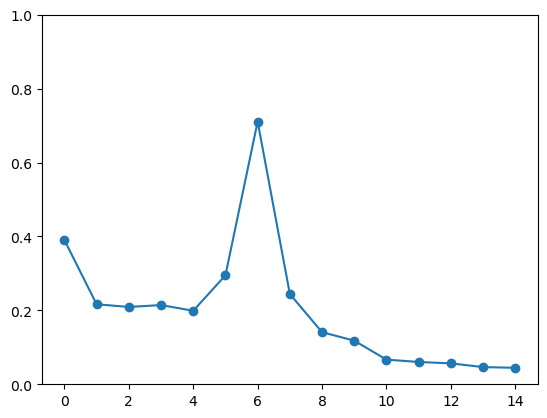

In [21]:
plt.plot(N_lst, mse_lst, '-o')
plt.ylim(0, 1)